In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from math import sqrt
from functools import reduce

In [2]:
#Lendo os arquivos csv de precipitacao e de casos de dengue
df_precipitacao = pd.read_csv('inmet/all_cities.csv', sep=',')
df_dengue = pd.read_csv('datasus/all_dengue.csv', sep=';')

In [3]:
"""
TRATAMENTO DO ARQUIVO CSV CONTENDO OS DADOS DE PRECIPITACAO
"""

#Criando dataframe de precipitacao por ano/mes de cada estacao
precipitacao_mes_ano = pd.DataFrame({'Precipitacao' : df_precipitacao.groupby(["Estacao", "year","month"])["Precipitacao"].sum()}).reset_index()

In [4]:
#Alterando os nomes das colunas do dataframe precipitacao_mes_ano
precipitacao_mes_ano.columns = ['MUNICIPIO','ANO','MES','PRECIPITACAO']

In [5]:
#Criando dataframe de precipitacao ano/mes de 2010 a 2012 de cada estacao
precipitacao_mes_ano_2010_2012 = precipitacao_mes_ano.loc[(precipitacao_mes_ano['ANO'] < 2013) & (precipitacao_mes_ano['ANO'] > 2009)]

In [6]:
#Criando dataframe de precipitacao por ano de cada estacao
precipitacao_ano = pd.DataFrame({'PRECIPITACAO' : precipitacao_mes_ano.groupby(["MUNICIPIO","ANO"])["PRECIPITACAO"].sum()}).reset_index()

In [7]:
#Precipitacao de todos os municipios por ano de 2010 a 2012 
precipitacao_ano_2010_2012 = precipitacao_ano.loc[(precipitacao_ano['ANO'] < 2013) & (precipitacao_ano['ANO'] > 2009)]

In [8]:
"""
FUNCAO COEFICIENTE DE CORRELACAO LINEAR
"""

#Funcao somatorio
def somatorio(lista):
    return reduce(lambda x, y: x + y, lista)

In [9]:
#Funcao potencia
def toPower(lista, p):
    return list(map(lambda x: (x**p),lista))

In [10]:
#Funcao Correlacao
def correlacao(list1, list2):
    length_lists = len(list1)
    somatorio_xy = somatorio(list(map(lambda x, y: x*y, list1, list2)))
    somatorio_x = somatorio(list1)
    somatorio_y = somatorio(list2)

    a = somatorio_xy - (somatorio_x * somatorio_y / length_lists)

    somatorio_quad_x = somatorio(toPower(list1, 2))
    somatorio_quad_y = somatorio(toPower(list2, 2))
    somatorio_x_quad = toPower([somatorio(list1)], 2)[0]
    somatorio_y_quad = toPower([somatorio(list2)], 2)[0]

    b1 = somatorio_quad_x - (somatorio_x_quad / length_lists)
    b2 = somatorio_quad_y - (somatorio_y_quad / length_lists)

    b = sqrt(b1 * b2)

    return(a / b)

In [11]:
"""
RECIFE CASOS DE DENGUE E PRECIPITACAO (ANO COM MAIOR PRECIPITACAO)
"""

#Descobrindo o ano com maior precipitacao em Recife entre 2010 e 2012
df_recife_2010_2012 = precipitacao_ano_2010_2012.loc[(precipitacao_ano_2010_2012['MUNICIPIO'] == 'RECIFE')]
ano_recife_maior_precipitacao = df_recife_2010_2012[df_recife_2010_2012['PRECIPITACAO']==df_recife_2010_2012['PRECIPITACAO'].max()]['ANO'].values[0]

In [12]:
#Criando dataframe de precipitacao de Recife no ano de maior precipitacao (todos os meses)
recife_maior_precipitacao_2010_2012 = precipitacao_mes_ano_2010_2012.loc[(precipitacao_mes_ano_2010_2012['MUNICIPIO'] == 'RECIFE') & (precipitacao_mes_ano_2010_2012['ANO'] == ano_recife_maior_precipitacao)]

In [13]:
#Criando dataframe de casos de dengue do Recife no ano de maior precipitacao (todos os meses)
recife_casos_dengue = df_dengue.loc[(df_dengue['MUNICIPIO'] == 'RECIFE') & (df_dengue['ANO'] == ano_recife_maior_precipitacao)]

In [14]:
#Criando dataframe de relacao casos de dengue x precipitacao do Recife no ano de maior precipitacao (todos os meses)
relacao_dengue_precipitacao_recife = recife_casos_dengue.copy()
relacao_dengue_precipitacao_recife['PRECIPITACAO'] = recife_maior_precipitacao_2010_2012['PRECIPITACAO'].values

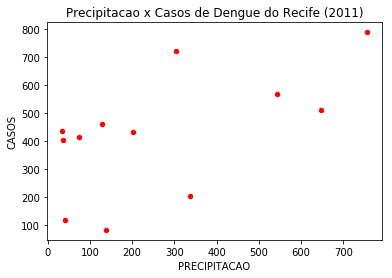

In [15]:
#Grafico de dispersao precipitacao x casos de dengue por mes do ano de maior Precipitacao do municipio Recife
relacao_dengue_precipitacao_recife.plot(x='PRECIPITACAO',y='CASOS',kind='scatter', title='Precipitacao x Casos de Dengue do Recife ('+str(ano_recife_maior_precipitacao)+')',color='r')

In [16]:
#Aplicando o metodo de Coeficiente de Correlacao Linear
list1 = relacao_dengue_precipitacao_recife['PRECIPITACAO'].values.tolist()
list2 = relacao_dengue_precipitacao_recife['CASOS'].values.tolist()
correlacao(list1, list2)

0.5971088416660116

In [17]:
#Aplicando correlacao Spearman - nativo do Pandas
relacao_dengue_precipitacao_recife['PRECIPITACAO'].corr(relacao_dengue_precipitacao_recife['CASOS'], 'spearman')

0.55944055944055959

In [18]:
"""
TRIUNFO CASOS DE DENGUE E PRECIPITACAO (ANO COM MAIOR PRECIPITACAO)
"""

#Descobrindo o ano com maior precipitacao em Triunfo entre 2010 e 2012
df_triunfo_2010_2012 = precipitacao_ano_2010_2012.loc[(precipitacao_ano_2010_2012['MUNICIPIO'] == 'TRIUNFO')]
ano_triunfo_maior_precipitacao = df_triunfo_2010_2012[df_triunfo_2010_2012['PRECIPITACAO']==df_triunfo_2010_2012['PRECIPITACAO'].max()]['ANO'].values[0]

In [19]:
#Criando dataframe de precipitacao de Triunfo no ano de maior Precipitacao (todos os meses)
triunfo_maior_precipitacao_2010_2012 = precipitacao_mes_ano_2010_2012.loc[(precipitacao_mes_ano_2010_2012['MUNICIPIO'] == 'TRIUNFO') & (precipitacao_mes_ano_2010_2012['ANO'] == ano_triunfo_maior_precipitacao)]

In [20]:
#Criando dataframe de casos de dengue de Triunfo no ano de maior Precipitacao (todos os meses)
triunfo_casos_dengue = df_dengue.loc[(df_dengue['MUNICIPIO'] == 'TRIUNFO') & (df_dengue['ANO'] == ano_triunfo_maior_precipitacao)]

In [21]:
#Criando dataframe de relacao casos de dengue x precipitacao de Triunfo no ano de maior Precipitacao (todos os meses)
relacao_dengue_precipitacao_triunfo = triunfo_casos_dengue.copy()
relacao_dengue_precipitacao_triunfo['PRECIPITACAO'] = triunfo_maior_precipitacao_2010_2012['PRECIPITACAO'].values

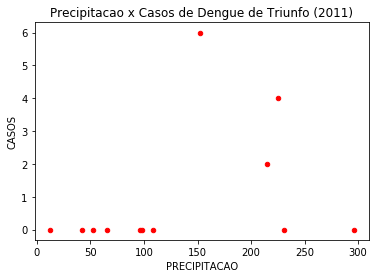

In [22]:
#Grafico de dispersao precipitacao x casos de dengue por mes do ano de maior Precipitacao do municipio Triunfo
relacao_dengue_precipitacao_triunfo.plot(x='PRECIPITACAO',y='CASOS',kind='scatter', title='Precipitacao x Casos de Dengue de Triunfo ('+str(ano_triunfo_maior_precipitacao)+')',color='r')

In [23]:
#Aplicando o metodo de Coeficiente de Correlacao Linear
list3 = relacao_dengue_precipitacao_triunfo['PRECIPITACAO'].values.tolist()
list4 = relacao_dengue_precipitacao_triunfo['CASOS'].values.tolist()
correlacao(list3, list4)

0.32970054585328357

In [24]:
#Aplicando correlacao Spearman - nativo do Pandas
relacao_dengue_precipitacao_triunfo['PRECIPITACAO'].corr(relacao_dengue_precipitacao_triunfo['CASOS'],'spearman')

0.40387373576316599

In [25]:
"""
CABROBÓ CASOS DE DENGUE E PRECIPITACAO (ANO COM MAIOR PRECIPITACAO)
"""

#Descobrindo o ano com maior precipitacao em Cabrobó entre 2010 e 2012
df_cabrobo_2010_2012 = precipitacao_ano_2010_2012.loc[(precipitacao_ano_2010_2012['MUNICIPIO'] == 'CABROBO')]
ano_cabrobo_maior_precipitacao = df_cabrobo_2010_2012[df_cabrobo_2010_2012['PRECIPITACAO']==df_cabrobo_2010_2012['PRECIPITACAO'].max()]['ANO'].values[0]

In [26]:
#Criando dataframe de precipitacao de Cabrobó no ano de maior Precipitacao (todos os meses)
cabrobo_maior_precipitacao_2010_2012 = precipitacao_mes_ano_2010_2012.loc[(precipitacao_mes_ano_2010_2012['MUNICIPIO'] == 'CABROBO') & (precipitacao_mes_ano_2010_2012['ANO'] == ano_cabrobo_maior_precipitacao)]

In [27]:
#Criando dataframe de casos de dengue de Cabrobó no ano de maior Precipitacao (todos os meses)
cabrobo_casos_dengue = df_dengue.loc[(df_dengue['MUNICIPIO'] == 'CABROBO') & (df_dengue['ANO'] == ano_cabrobo_maior_precipitacao)]

In [28]:
#Criando dataframe de relacao casos de dengue x precipitacao de Cabrobó no ano de maior Precipitacao (todos os meses)
relacao_dengue_precipitacao_cabrobo = cabrobo_casos_dengue.copy()
relacao_dengue_precipitacao_cabrobo['PRECIPITACAO'] = cabrobo_maior_precipitacao_2010_2012['PRECIPITACAO'].values

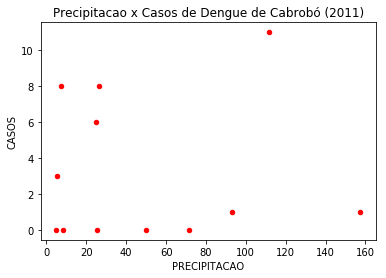

In [29]:
#Grafico de dispersao precipitacao x casos de dengue por mes do ano de maior Precipitacao do municipio Cabrobó
relacao_dengue_precipitacao_cabrobo.plot(x='PRECIPITACAO',y='CASOS',kind='scatter', title=u'Precipitacao x Casos de Dengue de Cabrobó ('+str(ano_cabrobo_maior_precipitacao)+')',color='r')

In [30]:
#Aplicando o metodo de Coeficiente de Correlacao Linear
list7 = relacao_dengue_precipitacao_cabrobo['PRECIPITACAO'].values.tolist()
list8 = relacao_dengue_precipitacao_cabrobo['CASOS'].values.tolist()
correlacao(list7, list8)

0.02798352765226463

In [31]:
#Aplicando correlacao Spearman - nativo do Pandas
relacao_dengue_precipitacao_cabrobo['PRECIPITACAO'].corr(relacao_dengue_precipitacao_cabrobo['CASOS'],'spearman')

0.13101394402234404

In [32]:
"""
OURICURI CASOS DE DENGUE E PRECIPITACAO (ANO COM MAIOR PRECIPITACAO)
"""

#Descobrindo o ano com maior precipitacao em Ouricuri entre 2010 e 2012
df_ouricuri_2010_2012 = precipitacao_ano_2010_2012.loc[(precipitacao_ano_2010_2012['MUNICIPIO'] == 'OURICURI')]
ano_ouricuri_maior_precipitacao = df_ouricuri_2010_2012[df_ouricuri_2010_2012['PRECIPITACAO']==df_ouricuri_2010_2012['PRECIPITACAO'].max()]['ANO'].values[0]

In [33]:
#Criando dataframe de precipitacao de Ouricuri no ano de maior Precipitacao (todos os meses)
ouricuri_maior_precipitacao_2010_2012 = precipitacao_mes_ano_2010_2012.loc[(precipitacao_mes_ano_2010_2012['MUNICIPIO'] == 'OURICURI') & (precipitacao_mes_ano_2010_2012['ANO'] == ano_ouricuri_maior_precipitacao)]

In [34]:
#Criando dataframe de casos de dengue de Ouricuri no ano de maior Precipitacao (todos os meses)
ouricuri_casos_dengue = df_dengue.loc[(df_dengue['MUNICIPIO'] == 'OURICURI') & (df_dengue['ANO'] == ano_ouricuri_maior_precipitacao)]

In [35]:
#Criando dataframe de relacao casos de dengue x precipitacao de Ouricuri no ano de maior Precipitacao (todos os meses)
relacao_dengue_precipitacao_ouricuri = ouricuri_casos_dengue.copy()
relacao_dengue_precipitacao_ouricuri['PRECIPITACAO'] = ouricuri_maior_precipitacao_2010_2012['PRECIPITACAO'].values

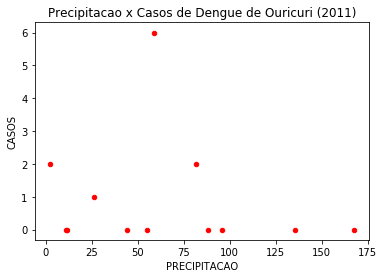

In [36]:
#Grafico de dispersao precipitacao x casos de dengue por mes do ano de maior Precipitacao do municipio Ouricuri
relacao_dengue_precipitacao_ouricuri.plot(x='PRECIPITACAO',y='CASOS',kind='scatter', title='Precipitacao x Casos de Dengue de Ouricuri ('+str(ano_ouricuri_maior_precipitacao)+')',color='r')

In [37]:
#Aplicando o metodo de Coeficiente de Correlacao Linear
list9 = relacao_dengue_precipitacao_ouricuri['PRECIPITACAO'].values.tolist()
list10 = relacao_dengue_precipitacao_ouricuri['CASOS'].values.tolist()
correlacao(list9, list10)

-0.16350702515022025

In [38]:
#Aplicando correlacao Spearman - nativo do Pandas
relacao_dengue_precipitacao_ouricuri['PRECIPITACAO'].corr(relacao_dengue_precipitacao_ouricuri['CASOS'],'spearman')

-0.26276015185165802

In [39]:
"""
PETROLINA CASOS DE DENGUE E PRECIPITACAO (ANO COM MAIOR PRECIPITACAO)
"""

#Descobrindo o ano com maior precipitacao em Petrolina entre 2010 e 2012
df_petrolina_2010_2012 = precipitacao_ano_2010_2012.loc[(precipitacao_ano_2010_2012['MUNICIPIO'] == 'PETROLINA')]
ano_petrolina_maior_precipitacao = df_petrolina_2010_2012[df_petrolina_2010_2012['PRECIPITACAO']==df_petrolina_2010_2012['PRECIPITACAO'].max()]['ANO'].values[0]

In [40]:
#Criando dataframe de precipitacao de Petrolina no ano de maior Precipitacao (todos os meses)
petrolina_maior_precipitacao_2010_2012 = precipitacao_mes_ano_2010_2012.loc[(precipitacao_mes_ano_2010_2012['MUNICIPIO'] == 'PETROLINA') & (precipitacao_mes_ano_2010_2012['ANO'] == ano_petrolina_maior_precipitacao)]

In [41]:
#Criando dataframe de casos de dengue de Petrolina no ano de maior Precipitacao (todos os meses)
petrolina_casos_dengue = df_dengue.loc[(df_dengue['MUNICIPIO'] == 'PETROLINA') & (df_dengue['ANO'] == ano_petrolina_maior_precipitacao)]

In [42]:
#Criando dataframe de relacao casos de dengue x precipitacao de Petrolina no ano de maior Precipitacao (todos os meses)
relacao_dengue_precipitacao_petrolina = petrolina_casos_dengue.copy()
relacao_dengue_precipitacao_petrolina['PRECIPITACAO'] = petrolina_maior_precipitacao_2010_2012['PRECIPITACAO'].values

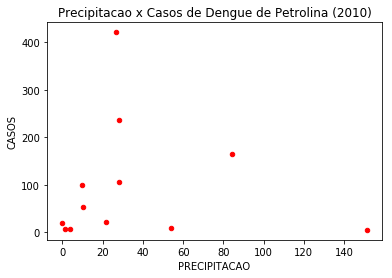

In [43]:
#Grafico de dispersao precipitacao x casos de dengue por mes do ano de maior Precipitacao do municipio Petrolina
relacao_dengue_precipitacao_petrolina.plot(x='PRECIPITACAO',y='CASOS',kind='scatter', title='Precipitacao x Casos de Dengue de Petrolina ('+str(ano_petrolina_maior_precipitacao)+')',color='r')

In [44]:
#Aplicando o metodo de Coeficiente de Correlacao Linear
list11 = relacao_dengue_precipitacao_petrolina['PRECIPITACAO'].values.tolist()
list12 = relacao_dengue_precipitacao_petrolina['CASOS'].values.tolist()
correlacao(list11, list12)

-0.034518245513192

In [45]:
#Aplicando correlacao Spearman - nativo do Pandas
relacao_dengue_precipitacao_petrolina['PRECIPITACAO'].corr(relacao_dengue_precipitacao_petrolina['CASOS'],'spearman')

0.20979020979020982

In [46]:
"""
SURUBIM CASOS DE DENGUE E PRECIPITACAO (ANO COM MAIOR PRECIPITACAO)
"""

#Descobrindo o ano com maior precipitacao em Surubim entre 2010 e 2012
df_surubim_2010_2012 = precipitacao_ano_2010_2012.loc[(precipitacao_ano_2010_2012['MUNICIPIO'] == 'SURUBIM')]
ano_surubim_maior_precipitacao = df_surubim_2010_2012[df_surubim_2010_2012['PRECIPITACAO']==df_surubim_2010_2012['PRECIPITACAO'].max()]['ANO'].values[0]

In [47]:
#Criando dataframe de precipitacao de Surubim no ano de maior Precipitacao (todos os meses)
surubim_maior_precipitacao_2010_2012 = precipitacao_mes_ano_2010_2012.loc[(precipitacao_mes_ano_2010_2012['MUNICIPIO'] == 'SURUBIM') & (precipitacao_mes_ano_2010_2012['ANO'] == ano_surubim_maior_precipitacao)]

In [48]:
#Criando dataframe de casos de dengue de Surubim no ano de maior Precipitacao (todos os meses)
surubim_casos_dengue = df_dengue.loc[(df_dengue['MUNICIPIO'] == 'SURUBIM') & (df_dengue['ANO'] == ano_surubim_maior_precipitacao)]

In [49]:
#Criando dataframe de relacao casos de dengue x precipitacao de Surubim no ano de maior Precipitacao (todos os meses)
relacao_dengue_precipitacao_surubim = surubim_casos_dengue.copy()
relacao_dengue_precipitacao_surubim['PRECIPITACAO'] = surubim_maior_precipitacao_2010_2012['PRECIPITACAO'].values

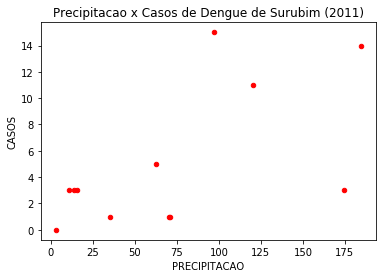

In [50]:
#Grafico de dispersao precipitacao x casos de dengue por mes do ano de maior Precipitacao do municipio Surubim
relacao_dengue_precipitacao_surubim.plot(x='PRECIPITACAO',y='CASOS',kind='scatter', title='Precipitacao x Casos de Dengue de Surubim ('+str(ano_surubim_maior_precipitacao)+')',color='r')

In [51]:
#Aplicando o metodo de Coeficiente de Correlacao Linear
list13 = relacao_dengue_precipitacao_surubim['PRECIPITACAO'].values.tolist()
list14 = relacao_dengue_precipitacao_surubim['CASOS'].values.tolist()
correlacao(list13, list14)

0.6100624727791992

In [52]:
#Aplicando correlacao Spearman - nativo do Pandas
relacao_dengue_precipitacao_surubim['PRECIPITACAO'].corr(relacao_dengue_precipitacao_surubim['CASOS'],'spearman')

0.55931585405648088

In [62]:
"""
ARCOVERDE CASOS DE DENGUE E PRECIPITACAO (ANO COM MAIOR PRECIPITACAO)
O ano com maior precipitacao entre 2010 a 2012 em Arcoverde e 2010, porem o mesmo nao possui os dados do mes interio de abril.
Por isso, para o caso de Arcoverde o ano escolhido foi o com menor precipitacao em vez o de maior.
"""

#Descobrindo o ano com menor precipitacao em Arcoverde entre 2010 e 2012
df_arcoverde_2010_2012 = precipitacao_ano_2010_2012.loc[(precipitacao_ano_2010_2012['MUNICIPIO'] == 'ARCOVERDE')]
ano_arcoverde_menor_precipitacao = df_arcoverde_2010_2012[df_arcoverde_2010_2012['PRECIPITACAO']==df_arcoverde_2010_2012['PRECIPITACAO'].min()]['ANO'].values[0]

In [63]:
#Criando dataframe de precipitacao de Arcoverde no ano de menor Precipitacao (todos os meses)
arcoverde_menor_precipitacao_2010_2012 = precipitacao_mes_ano_2010_2012.loc[(precipitacao_mes_ano_2010_2012['MUNICIPIO'] == 'ARCOVERDE') & (precipitacao_mes_ano_2010_2012['ANO'] == ano_arcoverde_menor_precipitacao)]

In [64]:
#Criando dataframe de casos de dengue de Arcoverde no ano de menor Precipitacao (todos os meses)
arcoverde_casos_dengue = df_dengue.loc[(df_dengue['MUNICIPIO'] == 'ARCOVERDE') & (df_dengue['ANO'] == ano_arcoverde_menor_precipitacao)]

In [65]:
#Criando dataframe de relacao casos de dengue x precipitacao de Arcoverde no ano de menor Precipitacao (todos os meses)
relacao_dengue_precipitacao_arcoverde = arcoverde_casos_dengue.copy()
relacao_dengue_precipitacao_arcoverde['PRECIPITACAO'] = arcoverde_menor_precipitacao_2010_2012['PRECIPITACAO'].values

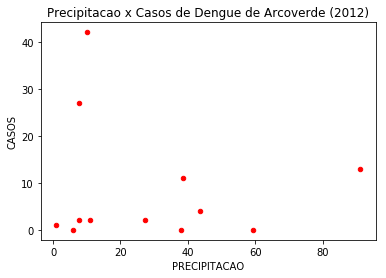

In [66]:
#Grafico de dispersao precipitacao x casos de dengue por mes do ano de menor Precipitacao do municipio Arcoverde
relacao_dengue_precipitacao_arcoverde.plot(x='PRECIPITACAO',y='CASOS',kind='scatter', title='Precipitacao x Casos de Dengue de Arcoverde ('+str(ano_arcoverde_menor_precipitacao)+')',color='r')

In [67]:
#Aplicando o metodo de Coeficiente de Correlacao Linear
list5 = relacao_dengue_precipitacao_arcoverde['PRECIPITACAO'].values.tolist()
list6 = relacao_dengue_precipitacao_arcoverde['CASOS'].values.tolist()
correlacao(list5, list6)

-0.11450886067562141

In [68]:
#Aplicando correlacao Spearman - nativo do Pandas
relacao_dengue_precipitacao_arcoverde['PRECIPITACAO'].corr(relacao_dengue_precipitacao_arcoverde['CASOS'],'spearman')

0.1063936823132013